In [28]:
# Author: Noel Dawe <noel.dawe@gmail.com>
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#sphx-glr-auto-examples-ensemble-plot-adaboost-regression-py
#
# License: BSD 3 clause

import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor

rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

In [57]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=5)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=5), n_estimators=100, random_state=rng
)
regr_3 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)

regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)
y_3 = regr_3.predict(X)

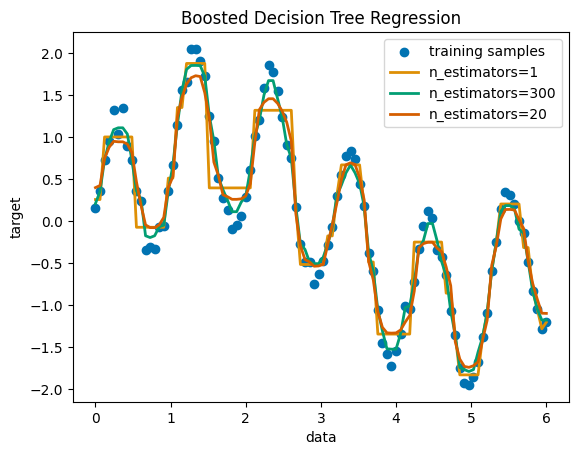

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X, y_1, color=colors[1], label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, color=colors[2], label="n_estimators=300", linewidth=2)
plt.plot(X, y_3, color=colors[3], label="n_estimators=20", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

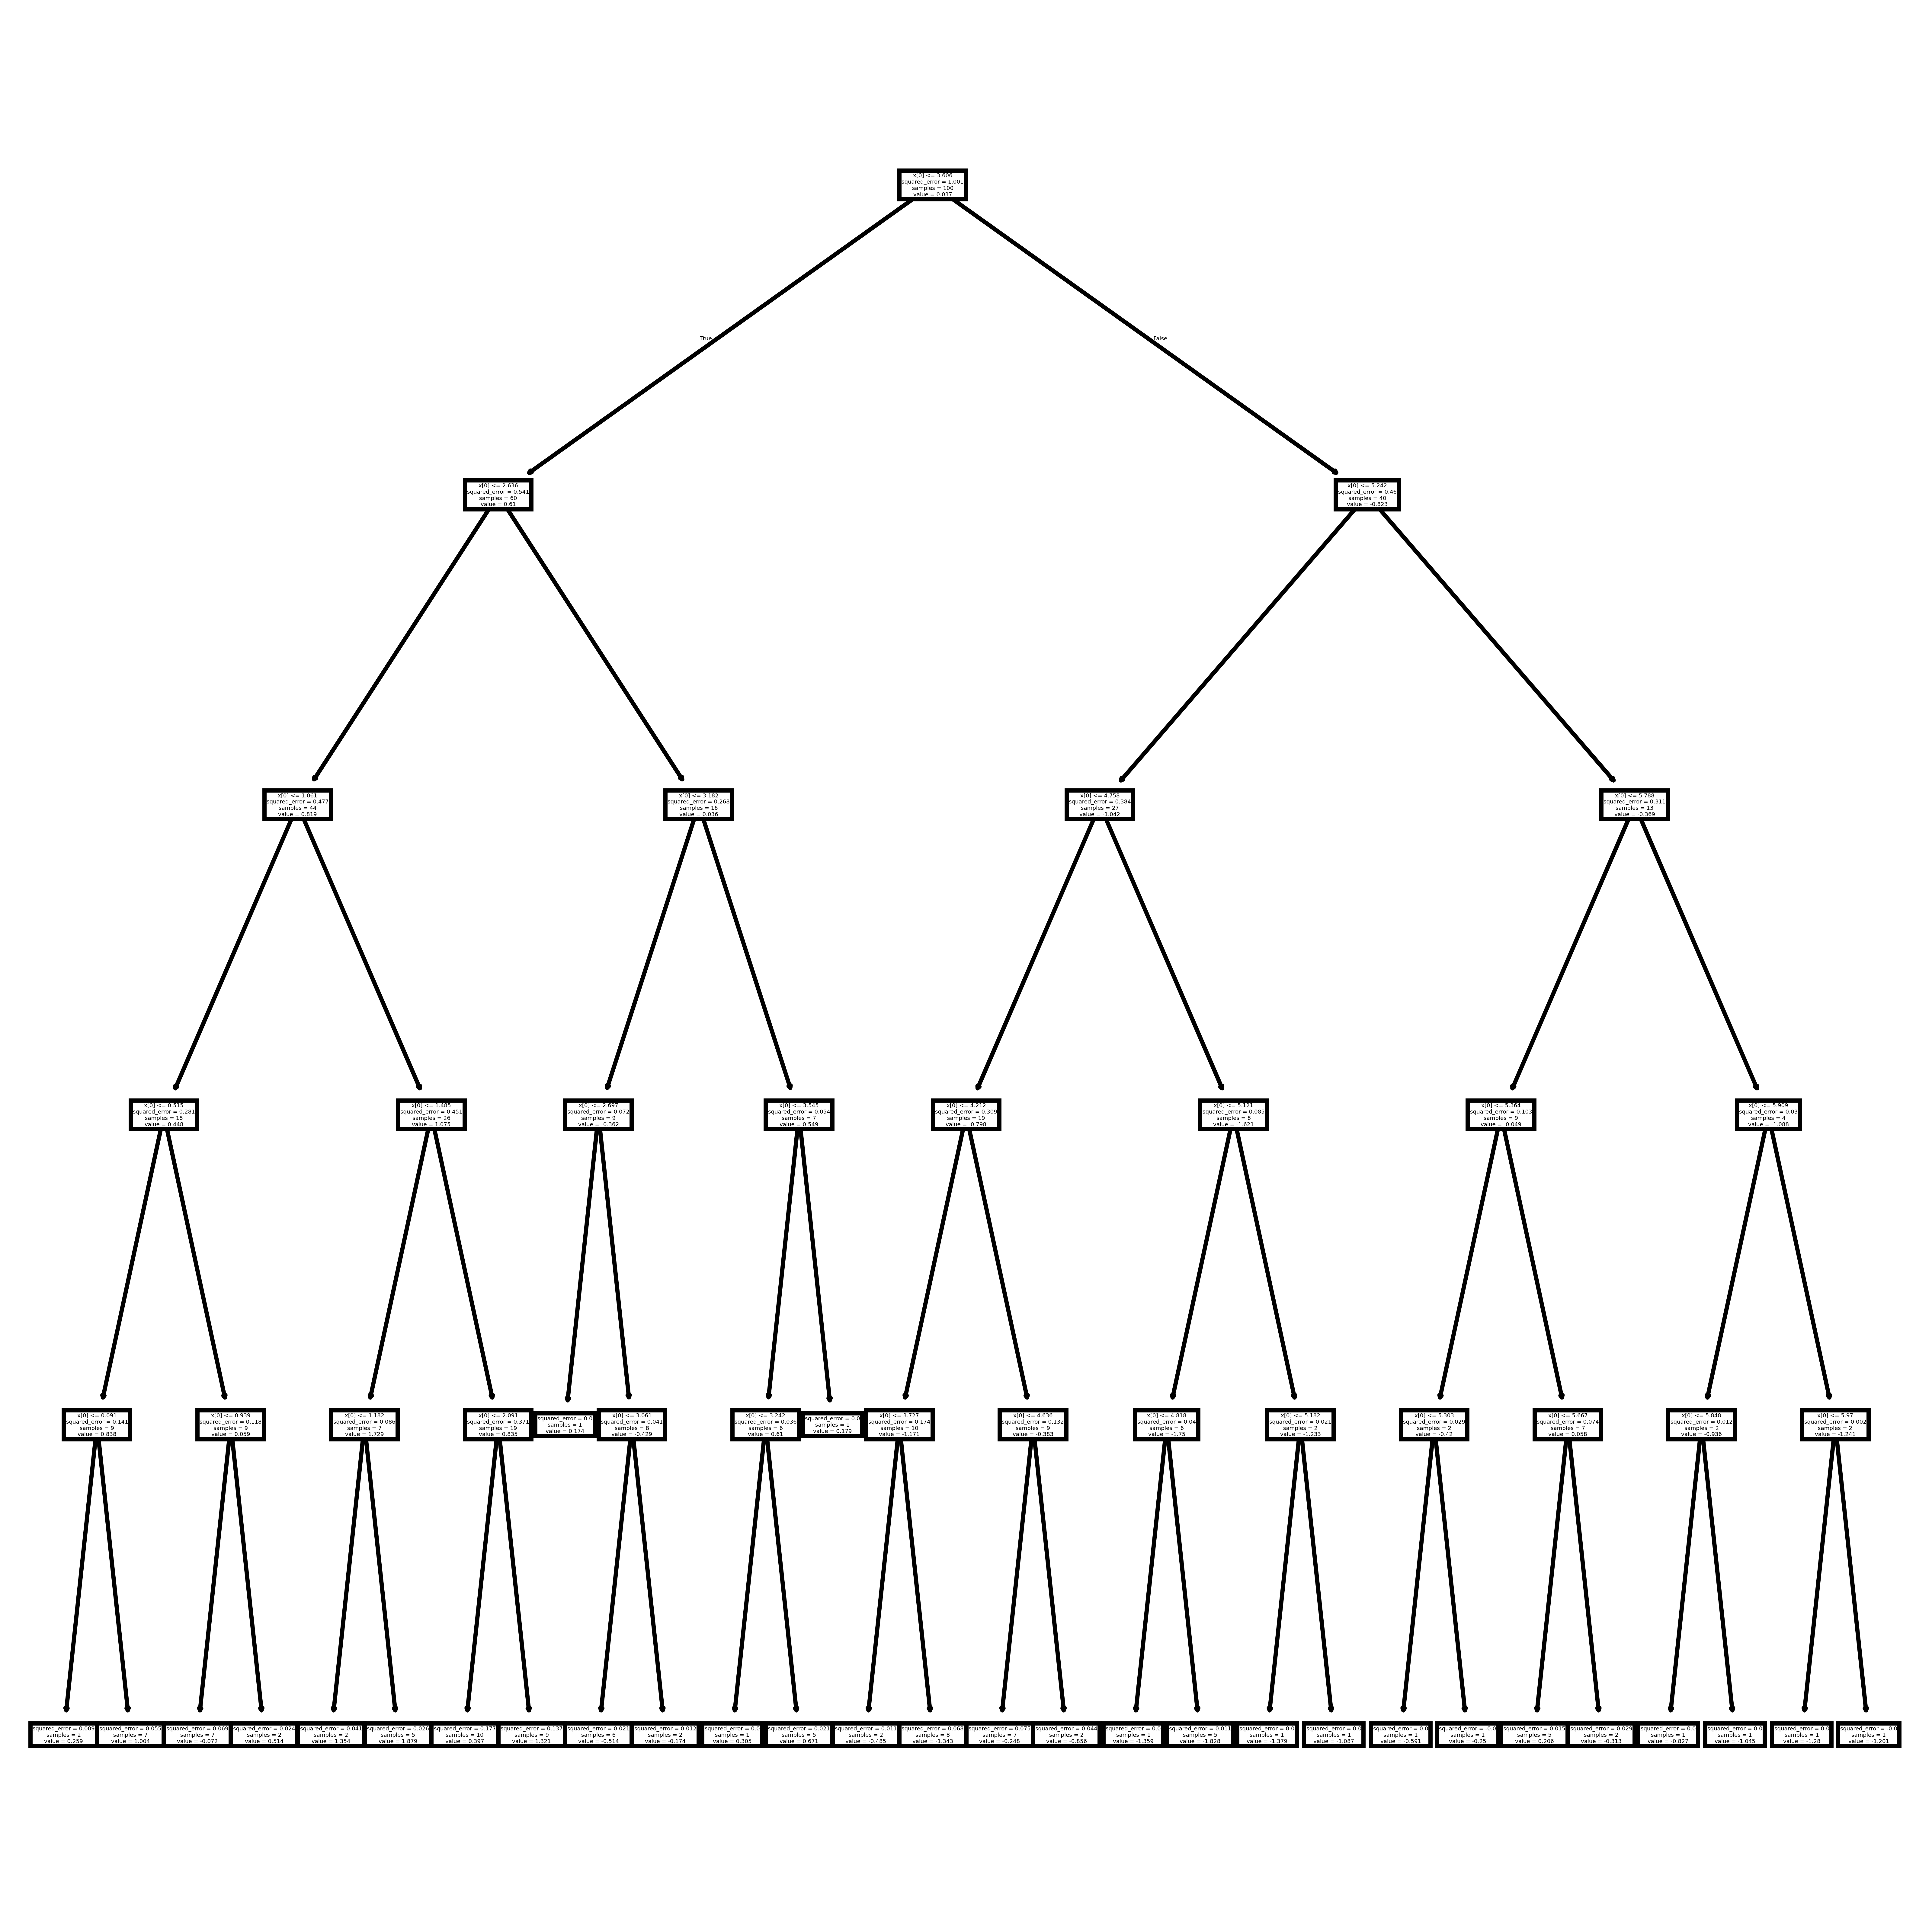

In [59]:
plt.figure(figsize=(8,8),dpi=1000)
# YOUR CODE GOES HERE
plot_tree(regr_1)
plt.show()

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
X, y = make_regression(n_samples=1000, n_features=10, n_informative=8,
                       random_state=20, shuffle=False)
regr = RandomForestRegressor(max_depth=30, n_estimators=200, random_state=0)
regr.fit(X, y)
y_1 = regr.predict(X)

mse = mean_squared_error(y, y_1)
print(mse)

#print(regr.predict([[0, 0, 0, 0]]))


268.4524313470981


range(0, 10)


<Figure size 640x480 with 0 Axes>

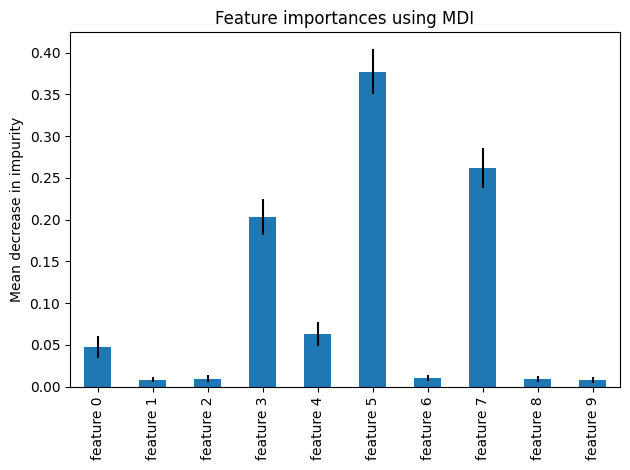

In [69]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
print(range(X.shape[1]))
importances = regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr.estimators_], axis=0)

import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

plt.figure()
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

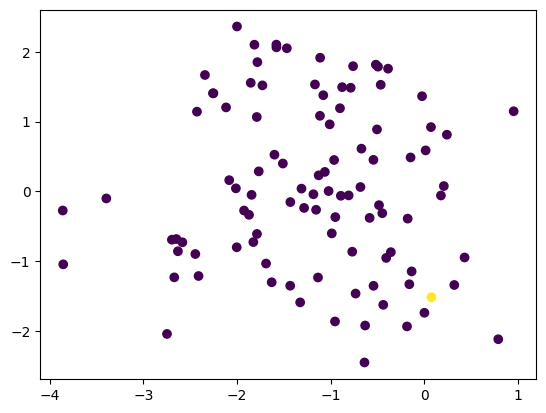

In [71]:
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap
X, y = make_classification(random_state=67,n_samples=100, n_features=2, n_redundant=0, n_repeated=0, n_classes=2,weights=np.array([0.99,0.01]))
X.shape
y.shape

plt.figure()
ax = plt.gca()
ax.scatter(X[:,0],X[:,1], c = y)


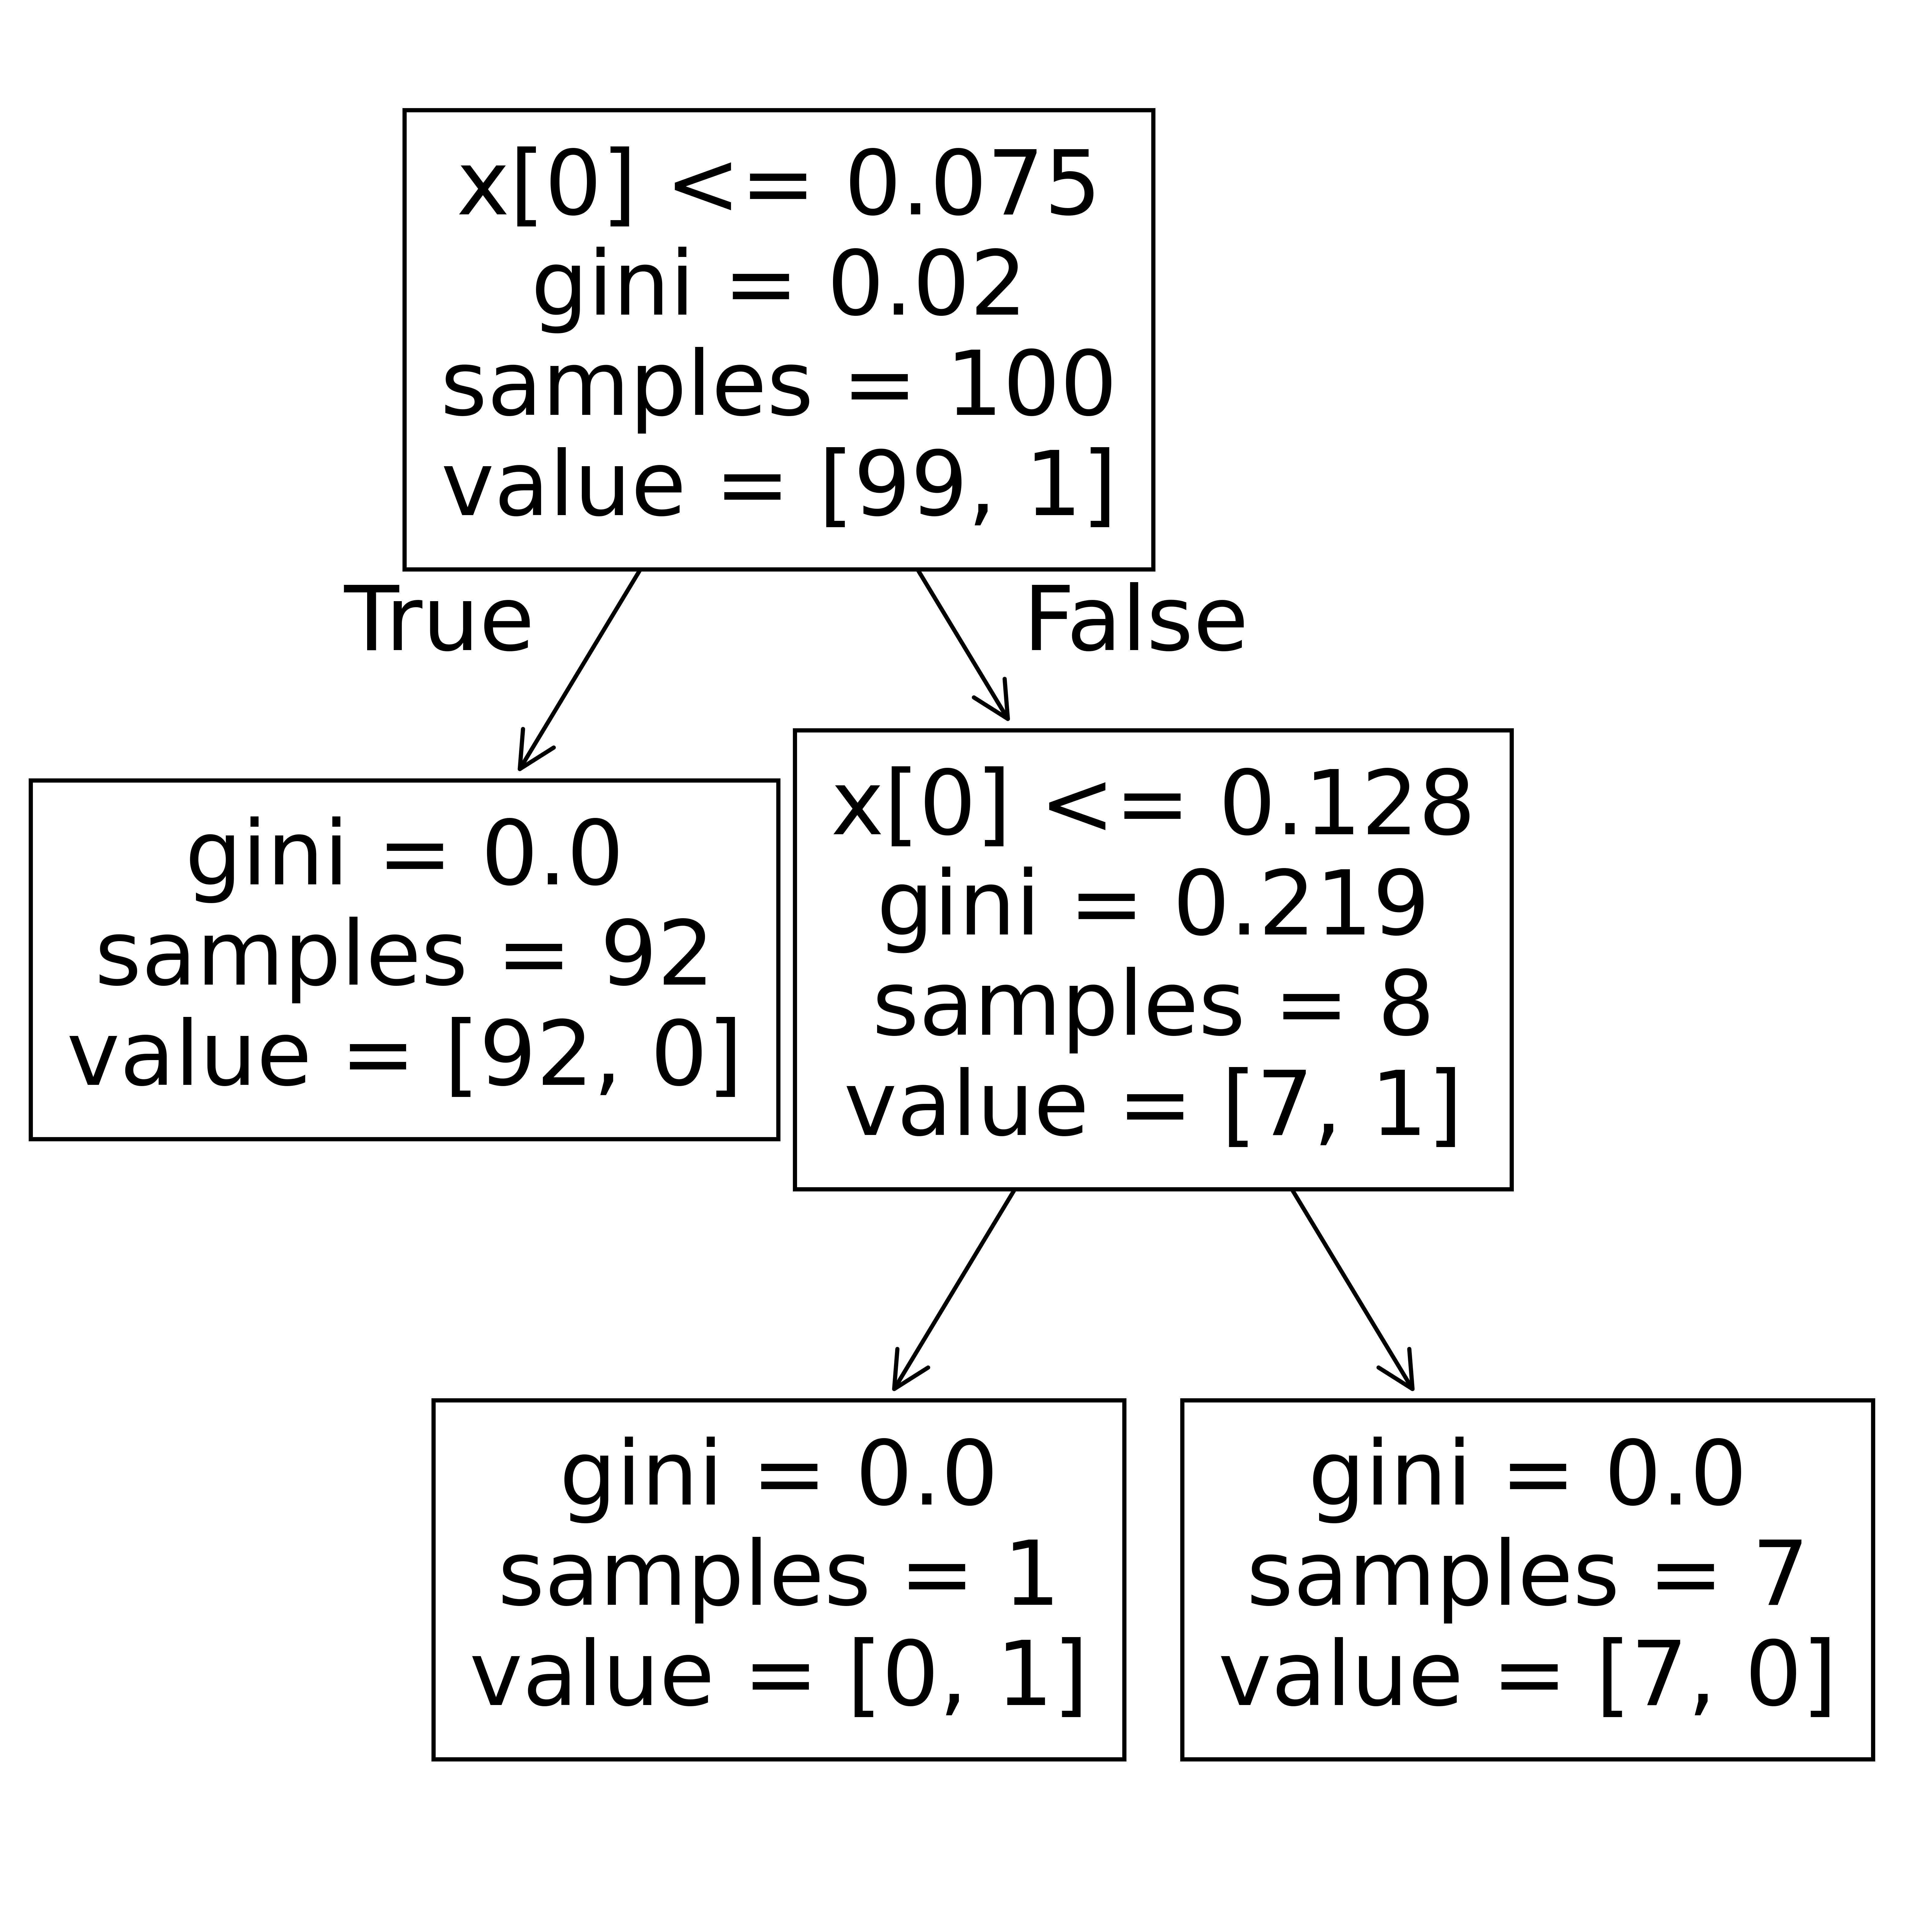

In [72]:
regr_1 = DecisionTreeClassifier(max_depth=5)

regr_1.fit(X, y)

y_1 = regr_1.predict(X)
plt.figure(figsize=(8,8),dpi=1000)
plot_tree(regr_1)
plt.show()
